<a href="https://www.kaggle.com/code/shreyashjaiswalshrey/hogwart-legacy-review-python-1st-project?scriptVersionId=121337125" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

#  First Project  Python['Hogwart Legacy Review ']

* Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

* Loading Data

In [2]:
df= pd.read_csv("/kaggle/input/hogwarts-legacy-reviews/hogwarts_legacy_reviews.csv")

* EDA

In [3]:
df.head()

,Unnamed: 0,Playtime,Feedback,Review
0,0,16,Positive,Greattt Game!
1,1,26,Positive,9/10Fantastic experience. A true Wizarding Wor...
2,2,29,Positive,worth it
3,3,24,Positive,I've been waiting 84 YEARSSSSSSSS.The game is ...
4,4,7,Positive,very fun game (it is not transphobic at all)


In [4]:
df.tail()

,Unnamed: 0,Playtime,Feedback,Review
46400,46400,4,Positive,Justice for Voldemort's nose!
46401,46401,11,Positive,WORTH EVERY PENNY! LOTS TO DO
46402,46402,8,Positive,"Awesome game! Awesome graphics, story line, an..."
46403,46403,1,Positive,"Well yes, I'm transphobic how did you know?"
46404,46404,6,Positive,I would take a Avada Kedavra and endure a Cruc...


In [5]:
df.describe()

,Unnamed: 0,Playtime
count,46405.000000,46405.000000
mean,23202.000000,11.478397
std,13396.113958,9.761163
min,0.000000,0.000000
25%,11601.000000,4.000000
50%,23202.000000,9.000000
75%,34803.000000,16.000000
max,46404.000000,122.000000


In [6]:
df['Playtime-Categorized'] =  np.where(df['Playtime']==0,'0-20', 
                                np.where(df['Playtime']/20<1, '0-20',  
                                 np.where(df['Playtime']/20<2, '21-40',
                                  np.where(df['Playtime']/20<3, '41-60',
                                   np.where(df['Playtime']/20<4, '61-80',
                                    np.where(df['Playtime']/20<5, '81-100',
                                     np.where(df['Playtime']/20<6, '101-120',
                                      np.where(df['Playtime']/20<7, '121-140',''
                                         ))))))))
df.head()

,Unnamed: 0,Playtime,Feedback,Review,Playtime-Categorized
0,0,16,Positive,Greattt Game!,0-20
1,1,26,Positive,9/10Fantastic experience. A true Wizarding Wor...,21-40
2,2,29,Positive,worth it,21-40
3,3,24,Positive,I've been waiting 84 YEARSSSSSSSS.The game is ...,21-40
4,4,7,Positive,very fun game (it is not transphobic at all),0-20


In [7]:
summary= df.groupby(by=['Playtime-Categorized','Feedback']).count().reset_index()
summary

,Playtime-Categorized,Feedback,Unnamed: 0,Playtime,Review
0,0-20,Negative,3221,3221,3220
1,0-20,Positive,35187,35187,35187
2,101-120,Positive,5,5,5
3,121-140,Positive,1,1,1
4,21-40,Negative,321,321,321
5,21-40,Positive,6872,6872,6872
6,41-60,Negative,52,52,52
7,41-60,Positive,635,635,635
8,61-80,Negative,10,10,10
9,61-80,Positive,85,85,85


* Plotting

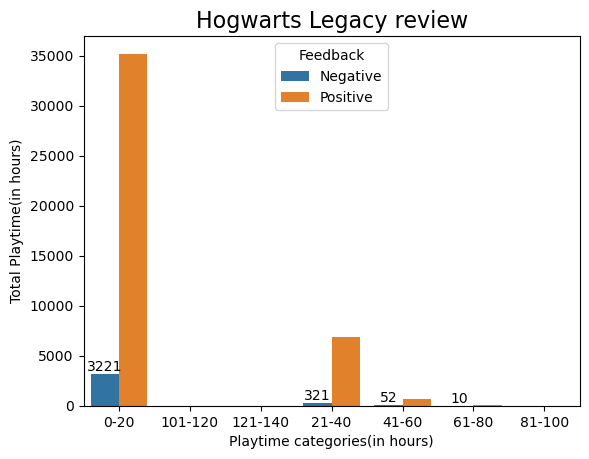

In [8]:
ax= sns.barplot(data=summary ,x='Playtime-Categorized', y='Playtime', hue='Feedback' )
plt.style.use('Solarize_Light2')
plt.title('Hogwarts Legacy review')
plt.xlabel('Playtime categories(in hours)')
plt.ylabel('Total Playtime(in hours)')
for c in ax.containers: 
    ax.bar_label(c)
    plt.show()